# task_notebook - 授人以鱼不如 授人以渔

### 环境准备：
#### jupyter notebook : https://www.jianshu.com/p/91365f343585
Jupyter Notebook是一块所见即所得的画布，通过在浏览器上编辑代码，让开发人员实现展示与快速迭代的利器。项目最初给予python，通过安装插件，对Javascript也有良好的支持。
#### 用Python来处理数据分析的优势：https://zhuanlan.zhihu.com/p/88450732
    - “流程可控，工作高效”
    - “工具库丰富”
    - “小白友好，易上手”
#### python和java区别
    - Java偏向于商业开发，Python适合于数据分析
    - Java是一种静态类型语言，Python是一种动态类型语言
    - 实现同一功能时，JAVA 要敲的键盘次数一般要比 Python 多。
#### 决策树相关算法介绍：https://blog.csdn.net/qingqing7/article/details/78416708

#### 会议总结
    - 对机器学习流程有所理解，但不够深入
    - 数据分析方面，常用方法梳理
    - 模型准确率影响因素
        - 算法挑选（没有最好的算法，只有最适合的算法）
        - 特征值的挑选
        - 模型训练数据量
        
#### 如何完成陌生任务
    - 将 任务 分3块
        - 1.需求，目标
        - 2.确定方法，明确步骤，分步骤执行
        - 3.输出结果与调优
    - 善用工具
    - 勤于总结
    - 积极沟通

# 目录：
### 1.引入依赖包
### 2.导入数据
### 3.清洗数据
### 4.数据分析
### 5.数据可视化
### 6.再次清洗数据
### 7.准备数据
### 8.建模、预测和评价

## 内容：


## 1.引入依赖包

In [1]:
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [2]:
# 数据分析和准备
import pandas as pd
import numpy as np
import random as rnd

from pandas.api.types import is_string_dtype

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

# 机器学习
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


## 2.导入数据

### 数据集简介：https://www.doc88.com/p-850514714440.html

### 首先将数据集获取到Pandas DataFrames中。

### 这里的数据集有以下几个问题：
 1. 数据集的数据中没有存放特征信息（列名列表），导致直接读取出来的数据会以第一行数据作为列属性。
    - 这里所做的处理是，在提供的数据集说明文件（bands.names）中找到列名，并将其写入数据文件的第一行中。
    - 或者，在代码中定义列名的数组，将其赋给读入的数据集文件列名属性
 2. 数据集在532行出现 错行 现象，该行后8个字段被缩进到了下一行，这里人为在数据集中进行了处理。
    - 这里所做的处理是，将错乱行数缩进改变，数据集的行数就都统一成了540行。
    - 或者，不做处理，在后面数据再清洗时删除这两行数据。

In [3]:
names=['timestamp','cylinder number','customer','job number','grain screened','ink color','proof on ctd ink',
      'blade mfg','cylinder division','paper type','ink type','direct steam','solvent type','type on cylinder',
      'press type','press','unit number','cylinder size','paper mill location','plating tank','proof cut',
      'viscosity','caliper','ink temperature','humifity','roughness','blade pressure','varnish pct','press speed',
      'ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density',
      'anode space ratio','chrome content','band type']

# train_df = pd.read_csv('bands_init.data',names=names)
train_df = pd.read_csv('bands.data')

#### 这里可以查看一下读取的数据预览（默认前5行和后5行）

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            540 non-null    int64 
 1   cylinder number      540 non-null    object
 2   customer             540 non-null    object
 3   job number           540 non-null    int64 
 4   grain screened       540 non-null    object
 5   ink color            540 non-null    object
 6   proof on ctd ink     540 non-null    object
 7   blade mfg            540 non-null    object
 8   cylinder division    540 non-null    object
 9   paper type           540 non-null    object
 10  ink type             540 non-null    object
 11  direct steam         540 non-null    object
 12  solvent type         540 non-null    object
 13  type on cylinder     540 non-null    object
 14  press type           540 non-null    object
 15  press                540 non-null    int64 
 16  unit num

- 这里可以看一下数据集的数据表

In [5]:
train_df

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
536,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
537,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
538,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


## 3.清洗数据

### 观察数据，发现以下问题，需对数据做清理

 1. 数据集在某些列，出现 '?' 为标识的数据，这里应该对数据的 '?' 做预处理。
    - 这里所做的处理是，将 '?' 数据检索到 并替换成 np.nan
 2. 基于看到的数据，发现数据中存在大小写区分
    - 这里所做的处理是，统一将str类型的数据转换成小写

In [6]:
# 把文件中的 ? 替换成 'nan'
# 把文件中 str 类型的值全部转换成小写
temp = 'aa22'
feature_list = train_df.columns.tolist()
for index in train_df.index:
    for feature in feature_list:
        if type(train_df.loc[index, feature]) == type(temp):
            train_df.loc[index, feature] = train_df.loc[index, feature].lower()
        if train_df.loc[index, feature] == '?':
            # print(train_df.loc[index, feature])
            train_df.loc[index, feature] = np.nan

#### 这里处理完后，可以查看下清洗后的数据

In [7]:
train_df

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,x126,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,x266,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,b7,modmat,47201,yes,key,yes,benton,gallatin,uncoated,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,t133,massey,39039,yes,key,yes,benton,gallatin,uncoated,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,j34,kmart,37351,no,key,yes,benton,gallatin,uncoated,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1,1,NaN,40,112.5,100,band
536,19941009,j44,best,38064,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,0,0,NaN,40,110,100,band
537,19941009,aa58,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,band
538,19941010,aa70,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,band


#### 由上图表可见，' ? ' 数据已统一处理为 NaN，并且 带有字母的字符串数据已统一转换成小写

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            540 non-null    int64 
 1   cylinder number      540 non-null    object
 2   customer             540 non-null    object
 3   job number           540 non-null    int64 
 4   grain screened       491 non-null    object
 5   ink color            540 non-null    object
 6   proof on ctd ink     483 non-null    object
 7   blade mfg            480 non-null    object
 8   cylinder division    540 non-null    object
 9   paper type           540 non-null    object
 10  ink type             540 non-null    object
 11  direct steam         515 non-null    object
 12  solvent type         485 non-null    object
 13  type on cylinder     522 non-null    object
 14  press type           540 non-null    object
 15  press                540 non-null    int64 
 16  unit num

### 这里的数据还有一个问题：
 1. 从数据集说明来看，某些列的数据应该为数字类型，但是这里因为有空数据所以 pandas识别成了object类型，无法做数据分析
    - 这里所做的处理是，将这些数据做类型判断，如果可以转换成数字类型，则转换；否则，不转换


In [9]:
# 从20列到39列 将列属性转换成float类型
i=20
while(i<39):
    count = 0
    for row in train_df[feature_list[i]]:
        try:
            float(row)
        except ValueError:
            train_df.loc[count,feature_list[i]] = np.nan
            pass
        count=count+1
    train_df[feature_list[i]]=train_df[feature_list[i]].astype(np.float64)
    # 输出转换过的列名
    print(feature_list[i])
    i=i+1


proof cut
viscosity
caliper
ink temperature
humifity
roughness
blade pressure
varnish pct
press speed
ink pct
solvent pct
ESA Voltage
ESA Amperage
wax
hardener
roller durometer
current density
anode space ratio
chrome content


#### 上面输出的是从object 转成 float类型的列名

#### 下面再来看一下清理以后的数据

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            540 non-null    int64  
 1   cylinder number      540 non-null    object 
 2   customer             540 non-null    object 
 3   job number           540 non-null    int64  
 4   grain screened       491 non-null    object 
 5   ink color            540 non-null    object 
 6   proof on ctd ink     483 non-null    object 
 7   blade mfg            480 non-null    object 
 8   cylinder division    540 non-null    object 
 9   paper type           540 non-null    object 
 10  ink type             540 non-null    object 
 11  direct steam         515 non-null    object 
 12  solvent type         485 non-null    object 
 13  type on cylinder     522 non-null    object 
 14  press type           540 non-null    object 
 15  press                540 non-null    int

## 4.数据分析

#### 输入include=['O']，计算离散型变量的统计特征.

##### 此图可以看出非空数量count，唯一值种类unique，出现最多的类型top和出现次数freq

In [11]:
train_df.describe(include=['O'])

,cylinder number,customer,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,cylinder size,paper mill location,plating tank,band type
count,540,540,491,540,483,480,540,540,540,515,485,522,540,537,384,522,540
unique,429,71,2,1,2,2,1,3,3,2,3,2,4,3,5,2,2
top,x129,kmart,no,key,yes,benton,gallatin,uncoated,coated,no,line,yes,motter94,tabloid,northus,1910,noband
freq,5,67,281,540,461,479,540,294,291,513,468,386,238,299,189,332,312


### 这里我们选定 最后一列 band type 作为目标值
- 首先需要对其值进行划分，将 { band, noband} 格式化为 { 1, 0}

In [12]:
num_encode = {
    'band type': {'noband':0, "band":1},
}
train_df.replace(num_encode,inplace=True)

In [13]:
train_df.describe()

,timestamp,job number,press,unit number,proof cut,viscosity,caliper,ink temperature,humifity,roughness,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
count,5.400000e+02,540.000000,540.000000,540.000000,485.000000,535.000000,513.000000,538.000000,539.000000,510.000000,...,484.000000,483.000000,485.000000,534.000000,533.000000,485.000000,533.000000,533.000000,537.000000,540.000000
mean,1.990780e+07,37287.531481,817.675926,4.877778,45.036082,50.938318,0.275710,15.362844,78.549165,0.724506,...,38.567645,1.319358,0.038144,2.399251,0.987054,34.775258,39.058161,103.044174,99.590317,0.422222
std,8.521975e+03,8728.998307,7.444076,3.250784,9.044097,8.055399,0.069487,1.278759,7.731008,0.193354,...,3.501431,2.462605,0.415466,0.546427,0.367821,4.505736,2.351290,5.011135,1.862768,0.494372
min,1.990033e+07,23040.000000,802.000000,1.000000,25.000000,35.000000,0.133000,11.200000,57.000000,0.056250,...,22.000000,0.000000,0.000000,0.000000,0.000000,28.000000,30.000000,83.330000,90.000000,0.000000
25%,1.990091e+07,34585.000000,815.000000,2.000000,40.000000,43.000000,0.200000,14.600000,73.000000,0.625000,...,36.800000,0.000000,0.000000,2.400000,0.800000,30.000000,40.000000,100.000000,100.000000,0.000000
50%,1.991012e+07,36062.500000,816.000000,2.000000,45.000000,50.000000,0.267000,15.200000,78.000000,0.750000,...,38.500000,0.000000,0.000000,2.500000,1.000000,34.000000,40.000000,103.130000,100.000000,0.000000
75%,1.991060e+07,37527.500000,824.000000,9.000000,50.000000,56.000000,0.300000,16.000000,82.000000,0.812500,...,41.200000,2.000000,0.000000,2.600000,1.000000,40.000000,40.000000,106.450000,100.000000,1.000000
max,1.994101e+07,88231.000000,828.000000,10.000000,72.500000,72.000000,0.533000,24.500000,105.000000,1.250000,...,53.400000,16.000000,6.000000,3.100000,3.000000,60.000000,45.000000,117.860000,100.000000,1.000000


- 再来看一下处理后的数据集

In [14]:
train_df

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,x126,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,1
1,19910109,x266,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,0
2,19910104,b7,modmat,47201,yes,key,yes,benton,gallatin,uncoated,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,0
3,19910104,t133,massey,39039,yes,key,yes,benton,gallatin,uncoated,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,0
4,19910111,j34,kmart,37351,no,key,yes,benton,gallatin,uncoated,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,1
536,19941009,j44,best,38064,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,1
537,19941009,aa58,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,1
538,19941010,aa70,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,1


### 数据相关性

#### 这里我们看一下每列和目标 band type 之间的数据相关性


#### 离散型数据相关性分析与特征挑选 - https://blog.csdn.net/qingqing7/article/details/78416708

In [15]:
# .corr是查看连续性变量之间的数据相关性
# 显示各元素间的相关性
# train_df.corr()

In [16]:
# 筛选出相关性大于0.8且不等于1的数据
# train_df.corr()[(train_df.corr() > 0.8) & (train_df.corr() != 1)]

### 查看分类数据和目标值的数据相关性
- 用循环输出所有分类特征的数据相关数据

In [17]:
# 查看分类数据和目标值的数据相关性
for feature in feature_list:
    if(feature!='band type'):
        print("################"+feature+"################")
        print(train_df[[feature, 'band type']].groupby([feature], as_index=False).mean().sort_values(by='band type', ascending=False))
 

################timestamp################
     timestamp  band type
0     19900330        1.0
197   19910618        1.0
199   19910622        1.0
200   19910626        1.0
201   19910627        1.0
..         ...        ...
183   19910517        0.0
179   19910505        0.0
174   19910428        0.0
96    19901119        0.0
148   19910308        0.0

[296 rows x 2 columns]
################cylinder number################
    cylinder number  band type
0              1351        1.0
120              g5        1.0
247            t195        1.0
113            g433        1.0
114            g459        1.0
..              ...        ...
273             w30        0.0
274            w357        0.0
275            w364        0.0
91             f629        0.0
214             o28        0.0

[429 rows x 2 columns]
################customer################
        customer  band type
70    yieldhouse        1.0
65       venture        1.0
53   ntlwildlife        1.0
45       kidsrus        1

In [18]:
# 测试---
# 复制并插入一列
# copy_list = []
# copy_list = train_df[['band type']]
# train_df.insert(40, 'copy_list', copy_list)   

# print(train_df[['ink type', 'band type']].groupby(['ink type'], as_index=False).mean())

In [19]:
# 测试---
# num_encode = {
#     'copy_list': {0:'noband', 1:"band"},
# }
# train_df.replace(num_encode,inplace=True)


In [20]:
# train_df

In [21]:
# 测试---
# train_df.iloc[0,40] = 'band'
# train_df.iloc[0,40]

In [22]:
# 测试---
# print(train_df[['copy_list', 'band type']].groupby(['copy_list'], as_index=False).mean())


In [23]:
# 测试---
# train_df[['copy_list', 'band type']].groupby(['copy_list'], as_index=False)

#### 从上述结果可以看出，
grain screened, blade mfg,paper type,ink type, direct steam
这些列与目标存在相关性。

## 5.数据可视化

#### 这里我们将刚刚分析出来的与目标相关的特征数据可视化

- 这里碰到一个问题，画图时，当数据有空值会导致画图失败
- 这里的解决办法是，在用众数填充空值后，再画图去分析。

In [24]:
# 绘画折线图：
# sns.lineplot(x='grain screened', y='band type', data=train_df)
# sns.lineplot(x='grain screened', y='band type', data=train_df)

# g = sns.FacetGrid(train_df, col='band type')
# g.map(plt.hist, 'grain screened', bins=20)


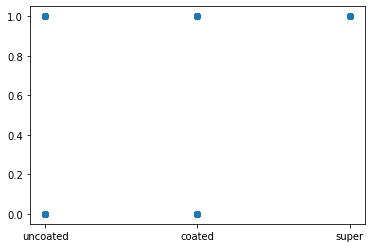

In [28]:
# 绘画散点图：
x = train_df['paper type']
y = train_df['band type']
color = ['r','y','k','g','m']
plt.scatter(x, y)
plt.show()

In [ ]:
# sns.lineplot(x='grain screened', y='band type', data=train_df)

In [ ]:
# sns.lineplot(x='blade mfg', y='band type', data=train_df)

# g = sns.FacetGrid(train_df, col='band type')
# g.map(plt.hist, 'blade mfg', bins=20)

In [ ]:
sns.lineplot(x='paper type', y='band type', data=train_df)
# g = sns.FacetGrid(train_df, col='paper type')
# g.map(plt.hist, 'paper type', bins=20)

In [ ]:
# sns.lineplot(x='ink type', y='band type', data=train_df)

# g = sns.FacetGrid(train_df, col='ink type')
# g.map(plt.hist, 'ink type', bins=20)

In [ ]:
# sns.lineplot(x='direct steam', y='band type', data=train_df)

# g = sns.FacetGrid(train_df, col='direct steam')
# g.map(plt.hist, 'direct steam', bins=20)

#### 这里是连续变量的相关性画图，因为该决策树算法只用到了分类数据，所以这里只例举一个特征，其余的同理。

In [ ]:
# viscosity
g = sns.FacetGrid(train_df, col='band type')
g.map(plt.hist, 'viscosity', bins=20)

In [ ]:
# humifity
# ink temperature
# proof cut
# roughness
# blade pressure
# varnish pct
# press speed
# ink pct
# solvent pct
# ESA Voltage
# ESA Amperage
# wax
# hardener
# roller durometer
# current density
# anode space ratio
# chrome content

## 6.再次清洗数据



#### 首先看下当前数据集的 行和列 数目

In [ ]:
train_df.shape

当前数据集中，存在目标值 band type 为空的数据， 应该删除这些错误数据

In [ ]:
for index in range(train_df.shape[0]):
    try:
        if np.isnan(train_df['band type'][index]):
            train_df=train_df.drop([index])
    except:
        pass
train_df.info()

### 用众数，填充空数据

In [ ]:
for item in train_df.columns.values.tolist():
    if train_df[item].dtype == object:
        train_df[item].fillna(train_df[item].mode(dropna=True)[0], inplace=True)
# 数字类型也填充
    if train_df[item].dtype == float:
        train_df[item].fillna(train_df[item].mode(dropna=True)[0], inplace=True)
train_df.info()

### 数据可视化
#### 折线图表现特征与目标直接的关系

In [ ]:
train_df.info()

In [ ]:
sns.lineplot(x='grain screened', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='ink color', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='proof on ctd ink', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='blade mfg', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='cylinder division', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='paper type', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='ink type', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='direct steam', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='solvent type', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='type on cylinder', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='press type', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='cylinder size', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='paper mill location', y='band type', data=train_df)

In [ ]:
sns.lineplot(x='plating tank', y='band type', data=train_df)

groupBy(A)：A列中重复的值和成同一个值，然后把A当成索引来进行重新的数据分组

In [ ]:
# 查看分类数据和目标值的数据相关性
for feature in feature_list:
    if(feature!='band type'):
        print("################"+feature+"################")
        print(train_df[[feature, 'band type']].groupby([feature], as_index=False).mean().sort_values(by='band type', ascending=False))
 

## 7.准备数据

### 把分类数据用数字类型的map替换，方便计算

### 这里map定义的大些，在特征选择时可从map中选定几个去训练

In [ ]:

encode = {
    'grain screened':{'yes':0,'no':1},
    'proof on ctd ink':{'yes':0,'no':1},
    'blade mfg':{'uddeholm':0,'benton':1},
    'paper type':{'coated':0,'uncoated':1,'super':2},
    'ink type':{'coated':0,'uncoated':1,'cover':2}, 
    'direct steam':{'yes':0,'no':1},
    'type on cylinder':{'yes':0,'no':1},
    'plating tank':{'1911':0,'1910':1},
    'solvent type':{'naptha':0,'line':1,'xylol':2},
    'press type':{'motter70':0,'motter94':1,'albert70':2,'woodhoe70':3},
    'paper mill location':{'scandanavian':0,'canadian':1,'northus':2,'mideuropean':3,'southus':4}
}
train_df.replace(encode, inplace=True)


In [ ]:
train_df

### 特征与目标选取
- 把所有重要的特征放到一个dataframe中，把目标放到一个series中。

- 决策树算法特征挑选 - https://blog.csdn.net/qingqing7/article/details/78416708

In [ ]:
X = train_df[['grain screened','blade mfg','direct steam','paper type', 'ink type','press type','solvent type']]
# X = train_df[['grain screened','blade mfg','direct steam','type on cylinder','plating tank']]
y = train_df['band type']

### 划分数据集
- 将数据集分成30%验证数据，70%训练数据

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_test

## 8.模型和预测

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')

In [ ]:
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))